# Generating Movie Insights using Exploratory Data Analysis for Microsoft Film Studios

**INTRODUCTION**

The key focus of this project is to conduct exploratory data analysis to provide actionable insights to determine the best performing films at the Box Office. The insights obtained will be used to give recommendations for the upcoming studio in order to increase their chances for success.

**OBJECTIVES**

The objectives are to analyze the data obtained from Box Office, create visualizations and to make recommendations on impactful strategies that should be implemented.







**1. BUSINESS UNDERSTANDING**

**The business problem:**

Microsoft is interested in venturing into the film industry after noticing the success in the industry by setting up a new film studio. They however have no experience in producing successful films. In order to optimize their chances for success, they will need insights regarding the best performing films at the Box Office. With the results from the analysis, they will be well informed on what successful film production entails.

The insights will answer questions such as:

- What are the best performing genres in the Box Office?
- What studios are the biggest competition?
- Does a higher rating yield higher performance? 



By translating these insights into practical recommendations, the new Microsoft studio will be better equipped to attain success in the competitive film industry.



**2. DATA UNDERSTANDING**


The data acqired for this analysis was extracted from:

- movie_basics
- movie_ratings
- bom.movie_gross.csv.gz

The aim is to spot trends and patterns which will enable them to understand the film inustry much better and to emmulate the factors that lead to success.

 **3. DATA PREPARATION**

To begin our analysis we must start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# Importing Sqlite3 Module
import sqlite3

# Initiating a connection to the SQL database
conn = sqlite3.connect('im.db/im.db')

# Loading the movie_basics table
query = "SELECT * FROM movie_basics;"
movie_basics = pd.read_sql_query(query, conn)

# Loading the movie_ratings table
query = "SELECT * FROM movie_ratings;"
movie_ratings = pd.read_sql_query(query, conn)

# Closing the database connection
conn.close()

In [3]:
# Loading the csv file
bom_movies_gross = pd.read_csv("bom.movie_gross.csv")

**Studying the datasets we will use for our analysis:**

In [4]:
# Viewing the movie basics table
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
# Viewing the movie ratings table
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# Viewing the bom.movies_gross table
bom_movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
# Getting info about movie_basics
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


This shows that there are missing values in the genre, runtime_minutes and original title columns. We will rectify it in the data cleaning.

In [8]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The movie_ratings table has no missing values.

In [9]:
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


It appears that there are missing values in the studio, domestic_gross and foreign_gross columns.

**Dropping duplicates and missing values:**

We will use the .drop_duplicates() function in pandas to remove the duplicate rows if any, from the three tables.

In [10]:
# Removing duplicates from the movie_basics table
movie_basics.drop_duplicates(inplace=True)

# Removing duplicates from the movie_ratings table
movie_ratings.drop_duplicates(inplace=True)

# Removing duplicates from the bom_movies_gross table
bom_movies_gross.drop_duplicates(inplace=True)

For handling the missing values, we will drop the rows with missing values in the movie_basics table and drop rows from the foreign_gross column in the bom_movies_gross table using the .dropna() function.

In [11]:
# Dropping the missing values
movie_basics.dropna(inplace=True)

In [12]:
# Dropping the missing values
bom_movies_gross.dropna(subset=["foreign_gross"], inplace=True)

In [16]:
# Ensuring the column has only numeric values and converting non-numeric values to NaN
bom_movies_gross["foreign_gross"] = pd.to_numeric(bom_movies_gross["foreign_gross"], errors="coerce")

For the missing values in the foreign_gross column we will fill them in with the mean value in the bom_movies_gross table.

In [17]:
# Replacing missing values with the mean
bom_movies_gross["foreign_gross"].fillna(bom_movies_gross["foreign_gross"].mean() ,inplace=True)

After dropping and filling in the missing values we will now check if they are still present using the .isnull() function and the .sum() function to count the number of present missing values is any.

In [18]:
# Verifying the presence of missing values in the movie_basics table
missing_values_count = movie_basics.isnull().sum()
print(missing_values_count)

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [19]:
# Verifying the presence of missing values in the bom_movies_gross table
missing_values_count = bom_movies_gross.isnull().sum()
print(missing_values_count)

title              0
studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64


Seeing that there are still missing values we will drop them.

In [23]:
bom_movies_gross.dropna(subset=["studio", "domestic_gross"], inplace=True)

In [24]:
# Confirming there are no missing values
missing_values_count = bom_movies_gross.isnull().sum()
print(missing_values_count)

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


Since we are now sure that there are no missing values, we will now check for duplicates. To check for duplicates, we will use the .duplicated() function and the .sum()function to count the number of duplicated rows  and columns if any.

In [25]:
# Dropping the original_title column since it is similar to the primary_title
# the axis=1 parameter is used to drop a column
movie_basics = movie_basics.drop("original_title", axis=1)
movie_basics

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
146134,tt9916160,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"


In [26]:
# Checking for duplicate rows in the movie_ratings table
duplicate_rows = movie_ratings.duplicated()
duplicate_rows_count = duplicate_rows.sum()
print(duplicate_rows_count)

0


In [27]:
# Checking for duplicate rows in the movie_basics table
duplicate_rows = movie_basics.duplicated()
duplicate_rows_count = duplicate_rows.sum()
print(duplicate_rows_count)


0


In [28]:
# Checking for duplicate rows in the bom_movies_gross table
duplicate_rows = bom_movies_gross.duplicated()
duplicate_rows_count = duplicate_rows.sum()
print(duplicate_rows_count)

0


**4. DATA ANALYSIS**

To begin we will merge the movie_basics table and bom_movies_gross table to find the genres with the highest performance at Box Office.
Followed by calculating the total revenue by adding the domestic and foreign gross and studying the findings.

**- What genres generate the most revenue?**

In [29]:
# Merge the movie_basics and bom_movies_gross tables
merged_data = pd.merge(movie_basics, bom_movies_gross, left_on= "primary_title", right_on="title", how="inner")

# Drop the primary_title column since title is present
merged_data.drop("primary_title", axis=1, inplace=True)

# Calculate total revenue by adding domestic gross and foreign gross
merged_data["total_revenue"] = merged_data["domestic_gross"] + merged_data["foreign_gross"]

# Create a new table with movie_id, primary title, genre, and total_revenue
merged_table = merged_data[["movie_id", "total_revenue", "genres", "title"]]

# View the first 10 columns of the table
merged_table.head(10)

,movie_id,total_revenue,genres,title
0,tt0337692,8.744000e+06,"Adventure,Drama,Romance",On the Road
1,tt2404548,8.744000e+06,Drama,On the Road
2,tt3872966,8.744000e+06,Documentary,On the Road
3,tt4339118,8.744000e+06,Drama,On the Road
4,tt5389486,8.744000e+06,Documentary,On the Road
5,tt5647250,8.744000e+06,Drama,On the Road
6,tt0359950,1.881000e+08,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty
7,tt0365907,5.320000e+07,"Action,Crime,Drama",A Walk Among the Tombstones
8,tt0369610,7.273570e+08,"Action,Adventure,Sci-Fi",Jurassic World
9,tt0372538,2.356000e+08,"Action,Crime,Drama",Spy


In [30]:
#Dropping any missing values 
merged_table = merged_table.dropna()
merged_table

,movie_id,total_revenue,genres,title
0,tt0337692,8744000.0,"Adventure,Drama,Romance",On the Road
1,tt2404548,8744000.0,Drama,On the Road
2,tt3872966,8744000.0,Documentary,On the Road
3,tt4339118,8744000.0,Drama,On the Road
4,tt5389486,8744000.0,Documentary,On the Road
...,...,...,...,...
1889,tt7752454,544100000.0,"Action,Comedy,Mystery",Detective Chinatown 2
1890,tt7784604,79400000.0,"Drama,Horror,Mystery",Hereditary
1891,tt8097306,33500000.0,"Comedy,Drama,Romance",Nobody's Fool
1892,tt8404272,82847000.0,Romance,How Long Will I Love U


In [31]:
# Sorting the total revenue in descending order
merged_table = merged_table.sort_values(by="total_revenue", ascending=False)
merged_table

,movie_id,total_revenue,genres,title
1378,tt2395427,1.405400e+09,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron
1041,tt1825683,1.347000e+09,"Action,Adventure,Sci-Fi",Black Panther
1415,tt2527336,1.332600e+09,"Action,Adventure,Fantasy",Star Wars: The Last Jedi
1747,tt4881806,1.309500e+09,"Action,Adventure,Sci-Fi",Jurassic World: Fallen Kingdom
403,tt2294629,1.276400e+09,"Adventure,Animation,Comedy",Frozen
...,...,...,...,...
482,tt8553606,1.080000e+04,"Comedy,Drama,Romance",Aurora
481,tt8396182,1.080000e+04,Drama,Aurora
480,tt8095720,1.080000e+04,"Biography,Documentary,Drama",Aurora
479,tt3603470,1.080000e+04,Drama,Aurora


Now since we have the table that we need we can use a bar chart to show the top successful genres in the representation of a bar chart from the most revenue generating one respectively.

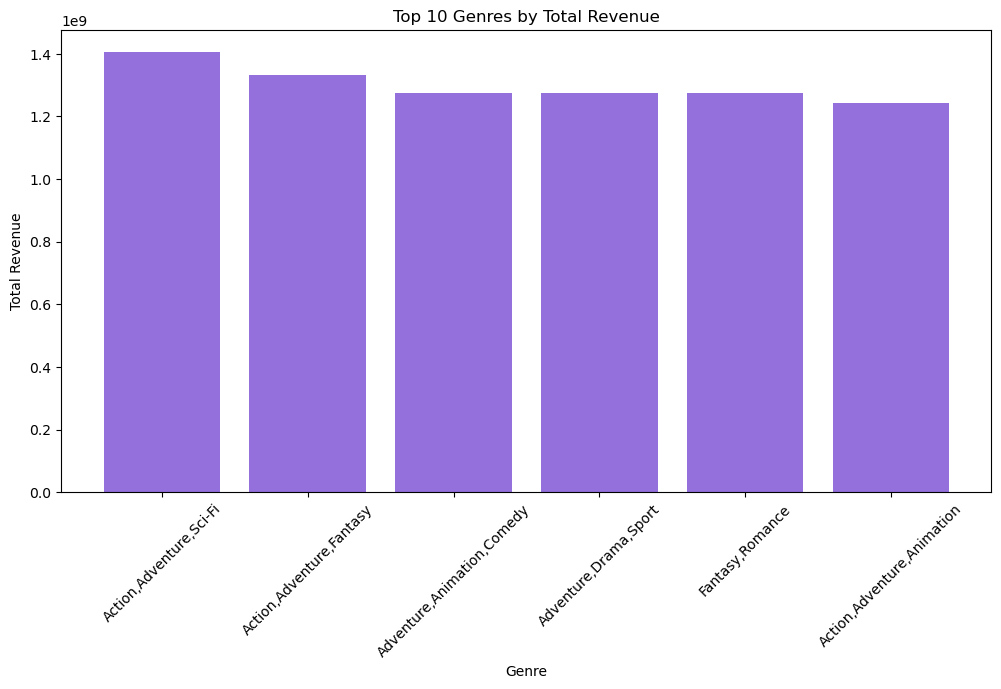

In [32]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bar chart
ax.bar(merged_table["genres"][:10], merged_table["total_revenue"][:10], color= "#9370DB")

# Setting labels and the title
ax.set_xlabel("Genre")
ax.set_ylabel("Total Revenue")
ax.set_title("Top 10 Genres by Total Revenue")

# Rotating the x-axis labels for easier legibility
plt.xticks(rotation=45)

# Showing the plot
plt.show()


Adventure, Action and Sci-fi are the highest revenue generating as we have noted from our table and bar chart. However horror based films are not that successful.

**- What studios are best performing?**

- Finding out the best performing studios will greatly help Microsoft know who their biggest competition is.
  
- To do this, we will join the studios column from the bom_movies_gross table and the merged_table table which has the total revenue. This helps to identify which studio generates the highest revenue.

In [33]:
# merging the two dataframes
#on is used to show the common column that acts as the key for merging
merged_table2 = pd.merge(merged_table, bom_movies_gross, on="title", how="left")
merged_table2

,movie_id,total_revenue,genres,title,studio,domestic_gross,foreign_gross,year
0,tt2395427,1.405400e+09,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
1,tt1825683,1.347000e+09,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000.0,2018
2,tt2527336,1.332600e+09,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3,tt4881806,1.309500e+09,"Action,Adventure,Sci-Fi",Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
4,tt2294629,1.276400e+09,"Adventure,Animation,Comedy",Frozen,BV,400700000.0,875700000.0,2013
...,...,...,...,...,...,...,...,...
1889,tt8553606,1.080000e+04,"Comedy,Drama,Romance",Aurora,CGld,5700.0,5100.0,2011
1890,tt8396182,1.080000e+04,Drama,Aurora,CGld,5700.0,5100.0,2011
1891,tt8095720,1.080000e+04,"Biography,Documentary,Drama",Aurora,CGld,5700.0,5100.0,2011
1892,tt3603470,1.080000e+04,Drama,Aurora,CGld,5700.0,5100.0,2011


We can also represent this visually using a scatter plot.

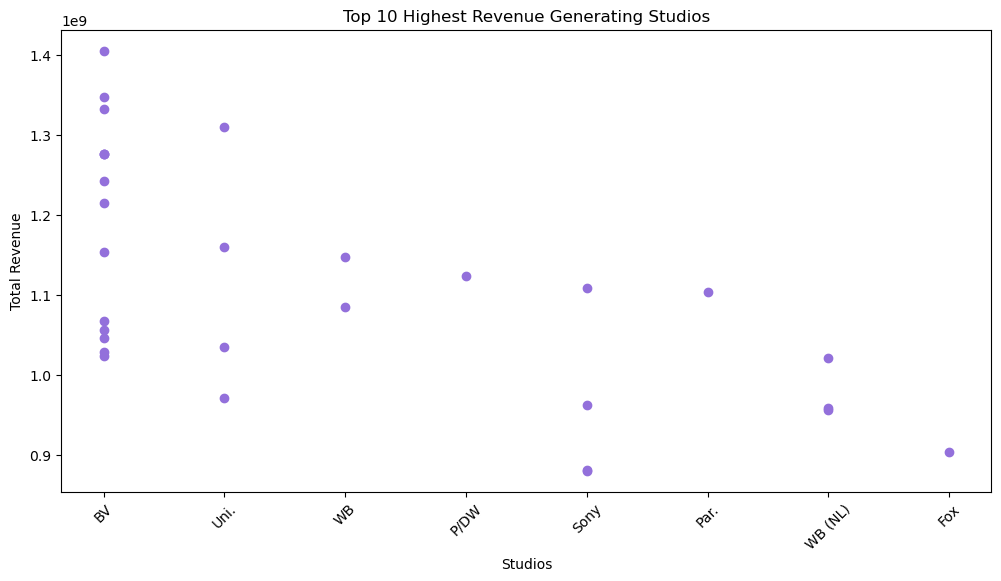

In [34]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the scatter plot
ax.scatter(merged_table2["studio"][:30], merged_table2["total_revenue"][:30], color= "#9370DB")

# Setting labels and the title
ax.set_xlabel("Studios")
ax.set_ylabel("Total Revenue")
ax.set_title("Top 10 Highest Revenue Generating Studios")

# Rotating the x-axis labels for easier legibility
plt.xticks(rotation=45)

# Showing the plot
plt.show()

The  position of the data point along the y-axis shows the revenue it generates and the higher the data point, the better the performance. The scatter plot shows a clear disparity in the studios' performance in the film industry with BV at the top of the competition.

**- Does a higher rating yield more success?**

To answer this question, we will join the merged_table table and movie_ratings to determine if higher ratings equal more success.

In [35]:
# Joining the two
joined_table = pd.merge(merged_table, movie_ratings, on="movie_id")
joined_table

,movie_id,total_revenue,genres,title,averagerating,numvotes
0,tt2395427,1.405400e+09,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,7.3,665594
1,tt1825683,1.347000e+09,"Action,Adventure,Sci-Fi",Black Panther,7.3,516148
2,tt2527336,1.332600e+09,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,7.1,462903
3,tt4881806,1.309500e+09,"Action,Adventure,Sci-Fi",Jurassic World: Fallen Kingdom,6.2,219125
4,tt2294629,1.276400e+09,"Adventure,Animation,Comedy",Frozen,7.5,516998
...,...,...,...,...,...,...
1762,tt8821182,1.080000e+04,"Horror,Thriller",Aurora,4.3,298
1763,tt8553606,1.080000e+04,"Comedy,Drama,Romance",Aurora,7.5,200
1764,tt8396182,1.080000e+04,Drama,Aurora,6.3,7
1765,tt3603470,1.080000e+04,Drama,Aurora,7.0,87


By sorting the numvotes column using the .sort_values() function, we can see if the ratings are related to the generated revenue.

In [59]:
# Sorting in descending order
joined_table = joined_table.sort_values("numvotes", ascending=False)
joined_table

,movie_id,total_revenue,genres,title,averagerating,numvotes
41,tt1375666,8.283000e+08,"Action,Adventure,Sci-Fi",Inception,8.8,1841066
15,tt1345836,1.084900e+09,"Action,Thriller",The Dark Knight Rises,8.4,1387769
73,tt0816692,6.774000e+08,"Adventure,Drama,Sci-Fi",Interstellar,8.6,1299334
136,tt1853728,4.254000e+08,"Drama,Western",Django Unchained,8.4,1211405
149,tt0993846,3.920000e+08,"Biography,Crime,Drama",The Wolf of Wall Street,8.2,1035358
...,...,...,...,...,...,...
593,tt5132504,9.800000e+07,Drama,Paul,4.8,6
446,tt1805319,1.464000e+08,Drama,Mama,4.5,6
745,tt4741754,6.860000e+07,Thriller,The Call,6.6,5
1246,tt3566920,1.430000e+07,Drama,The Other Side of the Door,3.8,5


As we can see the most number of votes corresponds to the highest revenue. Most films with high number of votes tend to have more total revenue. However, if you observe carefully that there are films with a significantly low rating but a large amount in the total revenue. This is an indication of the prescence of outliers.

We can represent this visually with the use of a scatter plot.

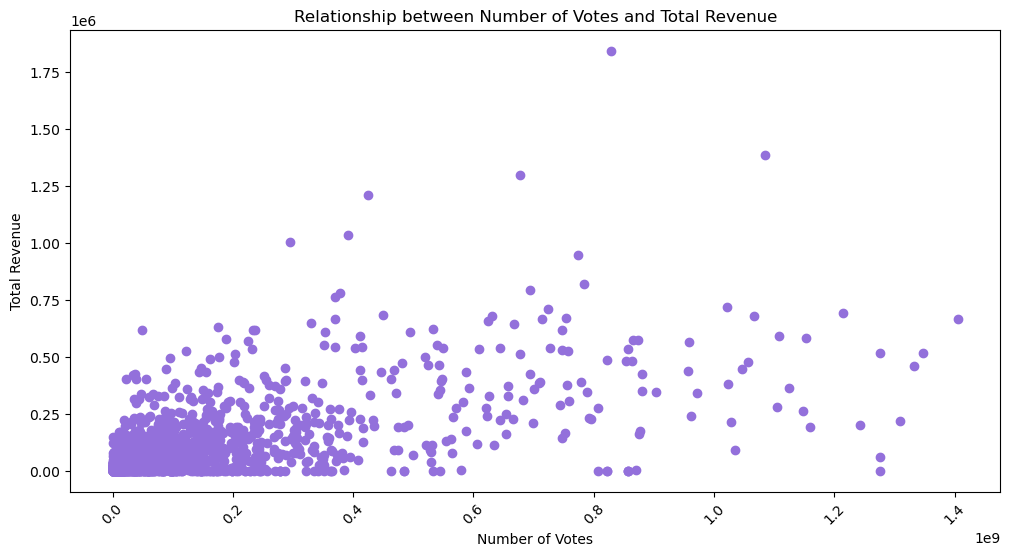

In [65]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the scatter plot
ax.scatter(joined_table["total_revenue"], joined_table["numvotes"], color= "#9370DB")

# Setting labels and the title
ax.set_xlabel("Number of Votes")
ax.set_ylabel("Total Revenue")
ax.set_title("Relationship between Number of Votes and Total Revenue")

# Rotating the x-axis labels for easier legibility
plt.xticks(rotation=45)

# Showing the plot
plt.show()

A high number of votes does not necessarily guarantee more revenue. This is noted from the plot where the highest data point is not aligned with the most number of votes.

**5. CONCLUSION**

1.  Adventure, Action and Sci-Fi genres have been consistent in generating the highest revenue, while horror based films perform poorer.

2.  BV(Buena Vista) and Uni(Universal) studios are the leading competition in the film industry.

3.  The relationship between ratings and performance is multi-layered, as some of the films with a lower rating still managed to attain substancial revenue suggesting secondary influence.  


**6. RECOMMENDATIONS**

1. Microsoft should focus on Adventure, Action and Sci-Fi films. They should also incorporate unique and compelling storylines for them to stand out.
- By exploring different themes in the said genres, they will capture the attention of niche audiences.

2. Additionally, they should analyze the strategies the successful studios adopt and also look for opportunities to partner with them.
 - This will increase their popularity and audience reach.

3. Lastly, since ratings alone do not ensure success, Microsoft should prioritize other strategies such as investing in a skilled marketing team. Other ways could be collaborating with social media influencers and working with well known actors/actresses .